## Advanced lane finding Approach 2 

In [9]:
# import libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os 



In [10]:
a = np.array([1])
a.astype

<function ndarray.astype>

In [11]:
def convertBGRImageToGrayScale(img_bgr):
    """ convert a bgr-colored image to grayscale """
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def convertToImageFormat(nd_array):
    """ converts the array to image format which is Unsigned Integer 8."""
    return np.copy(nd_array).astype(np.uint8)

def convertBGRImageToRGB(img_bgr):
    """ converts a bgr image to rgb image """
    new_rgb_image = np.zeros_like(img_bgr).astype(np.uint8)
    b,g,r = (0,1,2)
    new_rgb_image[:,:,0] = img_bgr[:,:,r]
    new_rgb_image[:,:,1] = img_bgr[:,:,g]
    new_rgb_image[:,:,2] = img_bgr[:,:,b]
    return new_rgb_image
    
def readImageFromFile(filename, base_dir = ''):
    """ read image from file """
    filepath = os.path.join(base_dir,filename)
    try: 
        img = cv2.imread(filepath)
#         img = mpimg.imread(filepath)
    except FileNotFoundError:
        print("File (%s) not Found on system"%filename)
    except Exception:
        print("Could not Read file (%)"%filename)
    return img

def smoothenWithGaussian(img_grayscale, kernel_size):
    """ returns an image that is the result of applying a gaussian
        smoothening filter """
    return cv2.GaussianBlur(img_grayscale, (kernel_size,kernel_size),
                            0)
        
def detectEdges(img_grayscale,low_threshold,high_threshold):
    """ returns a binary image where pixels that lie on an edge have a value of 
        255, else, 0. """
    edges = cv2.Canny(img_grayscale,low_threshold,high_threshold)
    # The output of Canny is not in image format. convert to image format 
    edges = convertToImageFormat(edges)
    return edges

def convertBGRImageToHSV(img_color_bgr):
    return cv2.cvtColor(img_color_bgr,cv2.COLOR_BGR2HSV)

def colorThreshWithHSVThreshold(img_bgr_color,hsv_low_threshold,hsv_high_threshold):
    """ returns a binary image that results from applying color thresholding where 
        regions that are in the range are given a value of 255, and 0 otherwist"""
    img_hsv_color = convertBGRImageToHSV(img_bgr_color)
    return cv2.inRange(img_hsv_color,hsv_low_threshold,hsv_high_threshold)    

def colorThreshWithBGRThreshold(img_color,bgr_low_threshold,bgr_high_threshold):
    """ 
    returns a binary image that results from applying color thresholding where
    regions that are in the range are given a value of 255, and 0 otherwise
    """ 
    binary_img = np.zeros_like((img_color.shape[0],img_color.shape[1]),dtype=img_color.dtype)
    ind1 = np.bitwise_and((img_color[:,:,0] >= bgr_low_threshold[0]),
                (img_color[:,:,0] <= bgr_high_threshold[0]))
    ind2 = np.bitwise_and((img_color[:,:,1] >= bgr_low_threshold[1]),
                (img_color[:,:,1] <= bgr_high_threshold[1]))
    ind3 = np.bitwise_and((img_color[:,:,2] >= bgr_low_threshold[2]),
                (img_color[:,:,2] <= bgr_high_threshold[2]))            
    ind_final = np.bitwise_and(ind1,ind2)
    ind_final = np.bitwise_and(ind_final,ind3)  

    binary_img = ind_final * 255
    binary_img = binary_img.astype(np.uint8)
                          
    return binary_img


def applyMask(img,mask):
    """ returns an image that results from applying the mask. 
    Note: 
        -mask must be a 2D binary image.  
        -img and mask must have the same first and second dimension. 
    """
    return cv2.bitwise_and(img,img,mask=mask)
              
def computePerspectiveTransformMatrix(img,src_polygon_xy,dest_polygon_xy):
    """ returns the perspective transform matrix.
        Note: 
            src_polygon : a 2D array of  (pixel_row,pixel_column)
            dest_polygon : a 2D array of pixel_row,pixel_column
        The correct ordering is done in the method. 
    """    
    return cv2.getPerspectiveTransform(src_polygon_xy,dest_polygon_xy)

def perspectiveTransformation(img,mapping,warped_img_shape_as_xy): 
    """
    returns an image that is the perspective transfomation of the img. 
    Args: 
        mapping : a list of two 2D numpy arrays that represent the mapping 
                    in (pixely, pixelx). 
    """
    # first, use the mapping to compute transformation matrix 
    transform_matrix= computePerspectiveTransformMatrix(img,mapping[0],mapping[1])
    #img_shape_as_xy = # (img.shape[1],img.shape[0])
    return cv2.warpPerspective(img,transform_matrix,warped_img_shape_as_xy,
                                      flags = cv2.INTER_NEAREST)



def clickCallback(event,x,y,flags=None,param=None):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("[x = %d, y = %d]"%(x,y))

def showImageWithInteraction(img,name,call_back):
    cv2.namedWindow(name)
    cv2.setMouseCallback(name,call_back)
    cv2.imshow(name,img)
    cv2.waitKey(0)
    
        
def showImageOutside(img):
    # displays the img outside the notebook in a new window. 
    cv2.imshow('',img)
    cv2.waitKey(0)
    
def showImageInline(img,is_bgr = True,**kwargs):
    # shows the image in the notebook. Note img must be in BGR format
    img_show = img
    if (is_bgr) and (len(img.shape) > 2):
        img_show = convertBGRImageToRGB(img)
    plt.figure()
    plt.imshow(img_show,**kwargs)

(540, 960, 3)


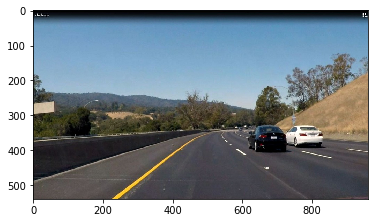

In [12]:
# Test run. 
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
print(img1.shape)
showImageInline(img1)
# test color thresholding
showImageWithInteraction(img1,'calibration',clickCallback)

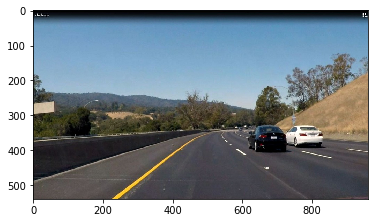

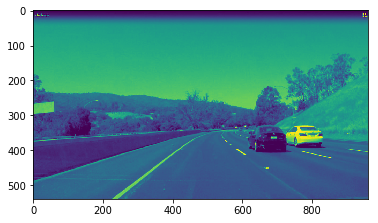

In [13]:
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
showImageInline(img1)

img2 = convertBGRImageToGrayScale(img1)
showImageInline(img2)


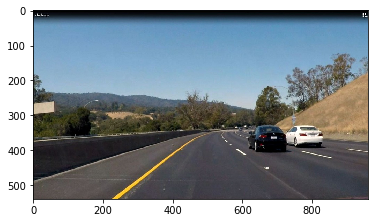

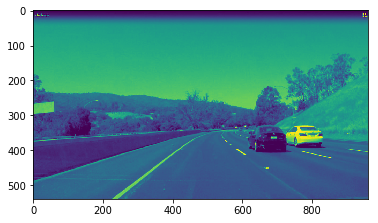

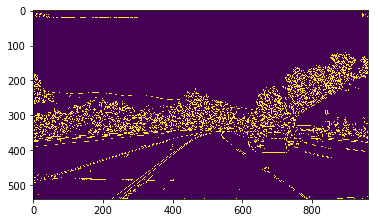

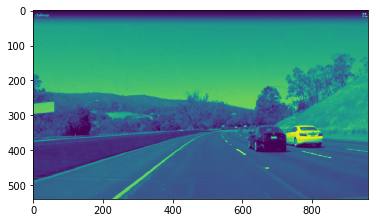

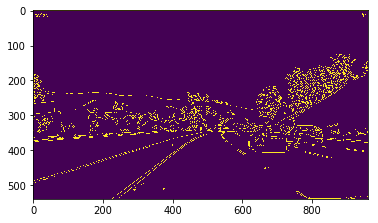

In [14]:
# Compare Edge detection with and without Smoothening
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
showImageInline(img1)

img2 = convertBGRImageToGrayScale(img1)
showImageInline(img2)
#:: without smoothening
img3 = detectEdges(img2,30,100)
showImageInline(img3)
#:: with smoothening 
img4 = smoothenWithGaussian(img2,5)
showImageInline(img4)
img5_edges = detectEdges(img4,30,100)
showImageInline(img5_edges)

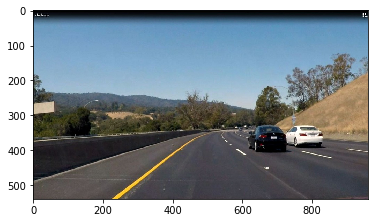

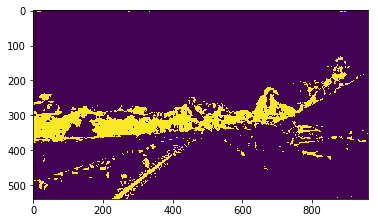

In [17]:
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
showImageInline(img1)

yellow_low_threshold  = np.array([20,0,0])
yellow_high_threshold = np.array([36,255,255])
# new_img = colorThreshWithHSVThreshold(img1,low_threshold,high_threshold)
new_img = colorThreshWithHSVThreshold(img1,yellow_low_threshold,yellow_high_threshold)
showImageInline(new_img)


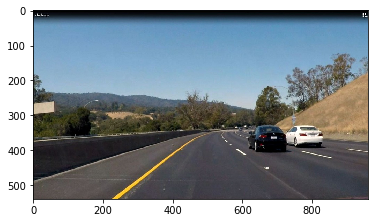

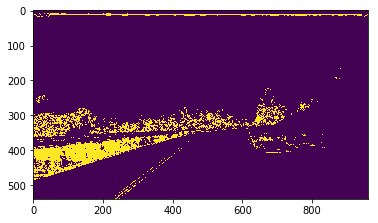

In [21]:
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
showImageInline(img1)

yellow_bgr_low_threshold  = np.array([250,215,60])
yellow_bgr_high_threshold = np.array([255,250,210])
# new_img = colorThreshWithHSVThreshold(img1,low_threshold,high_threshold)
new_img = colorThreshWithBGRThreshold(img1,yellow_low_threshold,yellow_high_threshold)
showImageInline(new_img)
print()

## Warp The Image

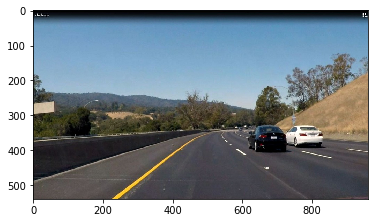

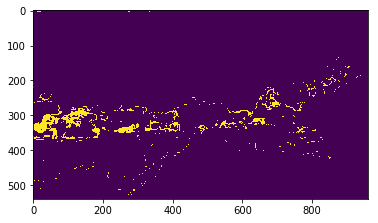

In [35]:
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
showImageInline(img1)

yellow_low_threshold  = np.array([30,0,0])
yellow_high_threshold = np.array([36,255,255])
# new_img = colorThreshWithHSVThreshold(img1,low_threshold,high_threshold)


# source_polygon = np.array(
# [[375, 415],
#  [217, 530],
#  [802, 520],
#  [607, 415]],dtype = np.float32)

source_polygon = np.array(
[[441, 372],
[213, 534],
[814, 534],
[560, 372]],dtype = np.float32)

destination_polygon = np.array(
[[200, 0],
 [200, 680],
 [1000,680],
[1000,0]],dtype = np.float32)


warped_img = perspectiveTransformation(img1,[source_polygon,destination_polygon],(1100,680))
# showImageInline(warped_img)

warped_img = smoothenWithGaussian(warped_img,5)
# showImageInline(warped_img)

img5_edges = detectEdges(warped_img,20,100)
# showImageInline(img5_edges)

img5_color_thresh = colorThreshWithHSVThreshold(img1,yellow_low_threshold,yellow_high_threshold)
showImageInline(img5_color_thresh)

# img_fused = cv2.bitwise_(img5_color_thresh,img5_edges)
# showImageInline(img_fused)

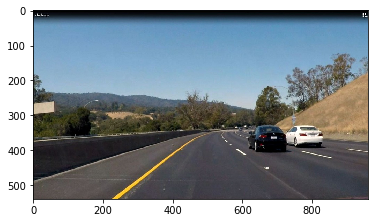

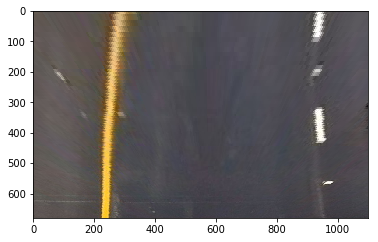

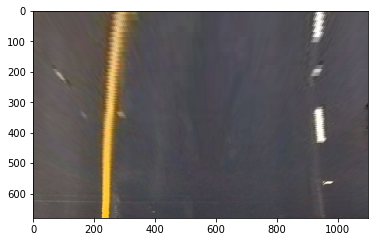

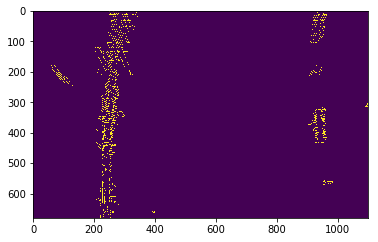

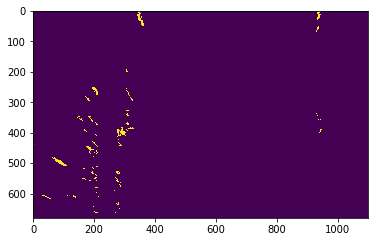

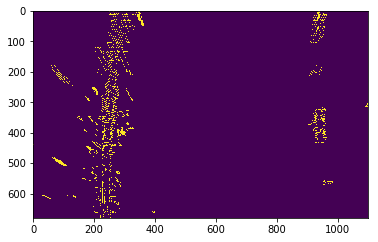

In [40]:
img_file = "challenge1.jpg"
base_directory = "test_images"
#:: read in the image 
img1 = readImageFromFile(img_file,base_directory)
showImageInline(img1)

yellow_low_threshold  = np.array([30,0,0])
yellow_high_threshold = np.array([36,255,255])
# new_img = colorThreshWithHSVThreshold(img1,low_threshold,high_threshold)


# source_polygon = np.array(
# [[375, 415],
#  [217, 530],
#  [802, 520],
#  [607, 415]],dtype = np.float32)

source_polygon = np.array(
[[441, 372],
[213, 534],
[814, 534],
[560, 372]],dtype = np.float32)

destination_polygon = np.array(
[[200, 0],
 [200, 680],
 [1000,680],
[1000,0]],dtype = np.float32)


warped_img = perspectiveTransformation(img1,[source_polygon,destination_polygon],(1100,680))
showImageInline(warped_img)

warped_img = smoothenWithGaussian(warped_img,5)
showImageInline(warped_img)

img5_edges = detectEdges(warped_img,15,100)
showImageInline(img5_edges)

img5_color_thresh = colorThreshWithHSVThreshold(warped_img,yellow_low_threshold,yellow_high_threshold)
showImageInline(img5_color_thresh)

img_fused = cv2.bitwise_or(img5_color_thresh,img5_edges)
showImageInline(img_fused)